In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Description 
The aim of this notebook is to understand the main concepts of (deep) neural networks and implement a toy neural network in Tensorflow.

# Creating mock data

Let us first generate a not linearly separable dataset, in this case, the well-known spiral dataset:

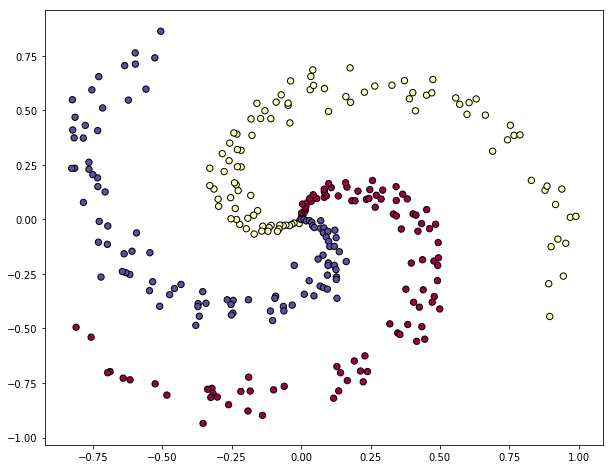

In [2]:
np.random.seed(100)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros((N*K, 3))
colors = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1,N) # radius
    t = np.linspace(j*4,(j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix, j] = 1
    colors[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, cmap=plt.cm.Spectral, edgecolors='black')

# Define input data
The Tensorflow model graph does not contain actual data, instead generic placeholder inputs. The actual data is fed later once the model has been completed. Let us define the `placeholders`:

In [3]:
# Data points placeholder
X_placeholder = tf.placeholder(tf.float32, shape=(None, D)) 

# Labels placeholder
y_placeholder = tf.placeholder(tf.float32, shape=(None, K))

# Define network parameters
The structure of our network will be the following. First, an input layer that is fed with the previous placeholders. Then, we will have a hidden layer that will allow us to generate non-linear relationships thanks to the activation function. Finally, the output layer will predict the labels of the datapoints.

In [4]:
n_hidden_units = 50

# Hidden layer
W_hidden = tf.Variable(tf.truncated_normal([D, n_hidden_units])) # dimensionality of the input data
b_hidden = tf.Variable(tf.zeros(shape=[n_hidden_units]))

hidden = tf.nn.relu(tf.matmul(X_placeholder, W_hidden) + b_hidden)

# Output layer
W_output = tf.Variable(tf.truncated_normal([n_hidden_units, 3]))
b_output = tf.Variable(tf.zeros(shape=[3]))

logits = tf.matmul(hidden, W_output) + b_output
# Convert outcomes to a probability distribution.
prediction = tf.nn.softmax(logits)

We have used the Rectified Linear Unit (RELU) activation function, which computes the function $f(x) = max(0,x)$, since it does not saturate and kill gradients as frequently as the sigmoid or tanh. Furthermore, we have initialized the weights to a truncated normal distribution and the biases to zero. Note that a common practice when using RELU is to initialize the bias to a small value such as 0.1.

# Define loss function and optimization method

To learn and train the network, we need to define a loss function. The common metric in classification is the cross entropy. The Gradient Descent method is the most used algorithm to minimize such loss function. We will implement in this case the Adam variant, which automatically readjust the learning rate.

In [5]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_placeholder)
loss = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer().minimize(loss)

# Compute the accuracy
correct = tf.equal(tf.argmax(logits, 1), tf.argmax(y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train the network
Finally, we will train the network model with actual data. Since this a mock example and we are just interested in whether the neural model is able to represent the spiral dataset, we will just train the model with all the data. A proper way to train the model is to use also a test dataset in order to check if the model generalises well. Furthermore, we will not use mini-batches because the number of datapoints is considerably small.

In [6]:
n_epochs = 2000

with tf.Session() as sess:
    # Initializes all the variables we made earlier.
    tf.global_variables_initializer().run()
    
    for epoch in range(n_epochs):
        feed_dict = {X_placeholder: X, y_placeholder : y}
        
        # Run the optimizer, loss, prediction and accuracy.
        _, loss_val, predictions_val, accuracy_val, = sess.run(
            [optimizer, loss, prediction, accuracy], 
                     feed_dict=feed_dict)
            
        if(epoch % 100 == 0):
            print("Epoch: ", epoch, ", the loss is: ", loss_val, " and the accuracy: ", accuracy_val)        

('Epoch: ', 0, ', the loss is: ', 2.5121422, ' and the accuracy: ', 0.21666667)
('Epoch: ', 100, ', the loss is: ', 0.80994517, ' and the accuracy: ', 0.61333334)
('Epoch: ', 200, ', the loss is: ', 0.61052513, ' and the accuracy: ', 0.71666664)
('Epoch: ', 300, ', the loss is: ', 0.51336569, ' and the accuracy: ', 0.81333333)
('Epoch: ', 400, ', the loss is: ', 0.44643611, ' and the accuracy: ', 0.86666667)
('Epoch: ', 500, ', the loss is: ', 0.39169094, ' and the accuracy: ', 0.9066667)
('Epoch: ', 600, ', the loss is: ', 0.34283751, ' and the accuracy: ', 0.93666667)
('Epoch: ', 700, ', the loss is: ', 0.30385071, ' and the accuracy: ', 0.94333333)
('Epoch: ', 800, ', the loss is: ', 0.27277696, ' and the accuracy: ', 0.95333332)
('Epoch: ', 900, ', the loss is: ', 0.24694648, ' and the accuracy: ', 0.95666665)
('Epoch: ', 1000, ', the loss is: ', 0.2251181, ' and the accuracy: ', 0.95999998)
('Epoch: ', 1100, ', the loss is: ', 0.20691244, ' and the accuracy: ', 0.95999998)
('Epoch

# Evaluation and final classification

The neural network model is able to correctly classified the 98% of the points. We will visually see this result plotting again the spiral dataset but using these new labels. We can detect one red mistake at the beginning of the spiral, as expected this region is difficult to guess.

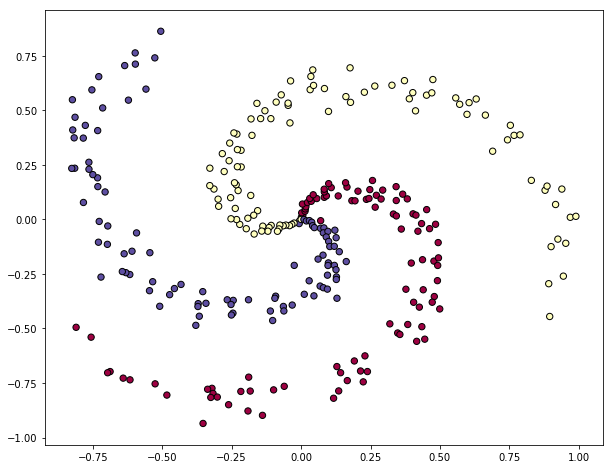

In [7]:
new_y = np.argmax(predictions_val, axis=1) # choose the label with highest probability
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=new_y, s=40, cmap=plt.cm.Spectral, edgecolors='black')

# References

I have studied and understood the basic concepts of neural networks thanks to the open courses provided by the Stanford, MIT and Oxford universities. They facilitate both theoretical and practical resources, which are really straightforward to follow and comprehend.

[1] 6.S191: Introduction to Deep Learning. http://introtodeeplearning.com/

[2] CS231n: Convolutional Neural Networks for Visual Recognition. http://cs231n.github.io/

[3] Deep Learning for Natural Language Processing. https://github.com/oxford-cs-deepnlp-2017/lectures